### STEP 01 - Exploratory Data Analysis & Visualization

In [2]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tqdm import tqdm_notebook
import numpy as np
import string

from collections import defaultdict

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import joblib
import pickle as pkl

from helper_code import *

In [5]:
def open_file(filename):
    with open(filename,'r',encoding="utf8") as f:
        data = f.readlines()
    return data

In [6]:
#Creating a dictionary file to save the content from various different languages and using the keys to label them

data_raw = dict()
data_raw['sk'] = open_file(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Sentences\train_sentences.sk')
data_raw['cs'] = open_file(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Sentences\train_sentences.cs')
data_raw['en'] = open_file(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Sentences\train_sentences.en')


In [7]:
data_raw

{'sk': ['Pán de Grandes Pascual jasne vysvetlil, aká je pridaná hodnota definície terorizmu, vyjadrením, že definícia, ktorú sme používali predtým, bola dôležitejšia, ale aj tým, že trval na zozname priestupkov.\n',
  'Keby sme sa nepokúsili o nemožné, ako by sme mohli dosiahnuť zmenu?\n',
  'Oznámil, že budúci týždeň sa zúčastní schôdze Výboru pre zahraničné veci.\n',
  'Niekedy by sa mohlo zdať, že ide o hru alebo pokrytectvo.\n',
  'Jej účelom je tiež identifikovať akékoľvek slabé miesta v systéme a právne nedostatky súdnej spolupráce v trestných veciach, aby sa európskym zákonodarcom poskytli všetky informácie potrebné na správne politické a regulačné hodnotenie.\n',
  'Na dosiahnutie tohto cieľa je mimoriadne dôležité, aby členské štáty zaviedli prijaté opatrenia a úzko spolupracovali.\n',
  '(FR) Pani predsedajúca, pán predseda Barroso nám stanovil náročný cieľ v oblasti výroby obnoviteľnej energie s cieľom znížiť emisie skleníkových plynov bez toho, aby sa brzdili naše vyhliadky

In [10]:
def show_statistics(data):
    for language, sentences in data.items():
        
        no_sen = 0
        no_words = 0
        unique_words = 0
        sample_extract = ''
        
        word_list = ' '.join(sentences).split()
        
        no_sen = len(sentences)
        no_words = len(word_list)
        unique_words = len(set(word_list))
        sample_extract = ' '.join(sentences[0].split()[0:7])
        
        print(f'Language: {language}')
        print('-----------------------')
        print(f'Number of sentences\t:\t {no_sen}')
        print(f'Number of words\t\t:\t {no_words}')
        print(f'Number of unique words\t:\t {unique_words}')
        print(f'Sample extract\t\t:\t {sample_extract}...\n')

In [11]:
show_statistics(data_raw)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...



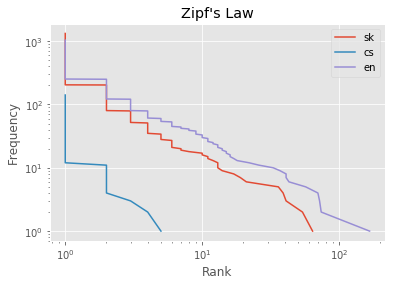

In [12]:
do_law_of_zipf(data_raw)

### STEP 02 - Data Cleaning & Preprocessing

In [13]:
def preprocess(text):
    '''
    The objective here is to remove punctuation, converting everything to lower case and get rid of punctuations and digits
    '''
    
    processed = text
    processed = processed.lower().replace('-',' ')
    translation_table = str.maketrans('\n',' ',string.punctuation + string.digits)
    processed = processed.translate(translation_table)
    
    return processed

In [14]:
processed_data = {k : [preprocess(sentence) for sentence in v] for k, v in data_raw.items()}

In [15]:
processed_data

{'sk': ['pán de grandes pascual jasne vysvetlil aká je pridaná hodnota definície terorizmu vyjadrením že definícia ktorú sme používali predtým bola dôležitejšia ale aj tým že trval na zozname priestupkov ',
  'keby sme sa nepokúsili o nemožné ako by sme mohli dosiahnuť zmenu ',
  'oznámil že budúci týždeň sa zúčastní schôdze výboru pre zahraničné veci ',
  'niekedy by sa mohlo zdať že ide o hru alebo pokrytectvo ',
  'jej účelom je tiež identifikovať akékoľvek slabé miesta v systéme a právne nedostatky súdnej spolupráce v trestných veciach aby sa európskym zákonodarcom poskytli všetky informácie potrebné na správne politické a regulačné hodnotenie ',
  'na dosiahnutie tohto cieľa je mimoriadne dôležité aby členské štáty zaviedli prijaté opatrenia a úzko spolupracovali ',
  'fr pani predsedajúca pán predseda barroso nám stanovil náročný cieľ v oblasti výroby obnoviteľnej energie s cieľom znížiť emisie skleníkových plynov bez toho aby sa brzdili naše vyhliadky na rast ',
  'táto požiadav

### STEP 03 - Classification Model : Naive Bayes 

#### Vectorize Dataset

In [16]:
sentences, y_train = [], []

for k, v in processed_data.items():
    for sentence in v:
        sentences.append(sentence)
        y_train.append(k)

In [17]:
vectorizer = CountVectorizer()

In [18]:
X_train = vectorizer.fit_transform(sentences)
X_train

<210x2208 sparse matrix of type '<class 'numpy.int64'>'
	with 3867 stored elements in Compressed Sparse Row format>

#### Initialize Model Parameters

In [19]:
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Vectorizing Validation Data & Evaluating Model

In [20]:
data_val = dict()
data_val['sk'] = open_file(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Sentences\val_sentences.sk')
data_val['cs'] = open_file(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Sentences\val_sentences.cs')
data_val['en'] = open_file(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Sentences\val_sentences.en')


In [21]:
val_preprocessed = {k : [preprocess(sentence) for sentence in v] for k, v in data_val.items()}

In [22]:
sentences_val, y_val = [], []

for k, v in processed_data.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [23]:
X_val = vectorizer.transform(sentences_val)
X_val

<210x2208 sparse matrix of type '<class 'numpy.int64'>'
	with 3867 stored elements in Compressed Sparse Row format>

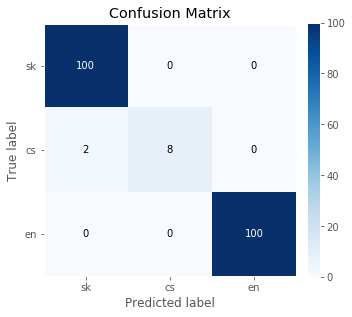

In [24]:
predictions = naive_classifier.predict(X_val)

plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])

### STEP 04 - Parameter Tuning For Enhanced Model Performance

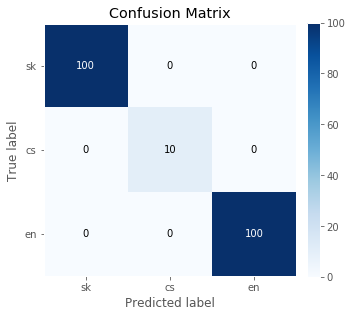

In [30]:
naive_classifier = MultinomialNB(alpha = 0.001, fit_prior = False)
naive_classifier.fit(X_train, y_train)
predictions_new = naive_classifier.predict(X_val)
plot_confusion_matrix(y_val, predictions_new, ['sk', 'cs', 'en'])

### STEP 05 - Using Subwords to Shift Perspective

Since we have texts from various different languages, we can try and split the words further to see if that improves the performance of the model.

In [37]:
import re, collections

def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for w, f in vocab.items():
        symbols = w.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i], symbols[i+1]] += f
    return pairs

In [32]:
def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word] 
    return v_out

In [33]:
def get_vocab(data):

    words = []
    for sentence in data:
        words.extend(sentence.split())
        
    vocab = defaultdict(int)
    for word in words:
        vocab[' '.join(word)] += 1
        
    return vocab

In [35]:
vocab = get_vocab(sentences)

In [38]:
# also taken from original paper
for i in range(100):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get) 
    vocab = merge_vocab(best, vocab)

In [39]:
merges = defaultdict(int)
for k, v in vocab.items():
    for subword in k.split():
        if len(subword) >= 2:
            merges[subword] += v

In [40]:
merge_ordered = sorted(merges, key=merges.get, reverse=True)

In [43]:
pkl.dump(merge_ordered, open(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Auxiliary\merge_ordered.pkl', 'wb'))

def split_into_subwords(text):
    merges = pkl.load(open(r'C:\Users\trish\Desktop\LanguageClassificationProject\Data\Auxiliary\merge_ordered.pkl', 'rb'))
    subwords = []
    for word in text.split():
        for subword in merges:
            subword_count = word.count(subword)
            if subword_count > 0:
                word = word.replace(subword, ' ')
                subwords.extend([subword]*subword_count)
    return ' '.join(subwords)

In [44]:
split_into_subwords('hey this is trishla here')

'is th is is la re'

In [45]:
data_preprocessed_subwords = {k: [split_into_subwords(sentence) for sentence in v] for k, v in processed_data.items()}

show_statistics(data_preprocessed_subwords)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 3431
Number of unique words	:	 75
Sample extract		:	 de an de al as ne as...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 239
Number of unique words	:	 59
Sample extract		:	 po je me or že je le...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 3863
Number of unique words	:	 75
Sample extract		:	 an st an er ou ro ch...



In [47]:
data_train_subwords = []
for sentence in sentences:
    data_train_subwords.append(split_into_subwords(sentence))

In [48]:
data_val_subwords = []
for sentence in sentences_val:
    data_val_subwords.append(split_into_subwords(sentence))

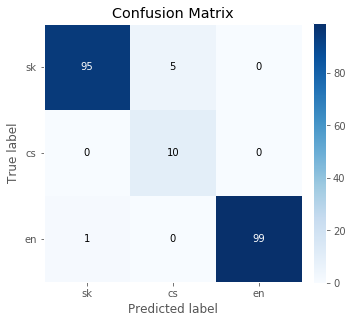

In [49]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(data_train_subwords)
X_val = vectorizer.transform(data_val_subwords)
naive_classifier = MultinomialNB(fit_prior=False)
naive_classifier.fit(X_train, y_train)
predictions = naive_classifier.predict(X_val)

plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])

In [ ]:
f1_score(y_val, predictions, average='weighted')